In [71]:
import mne
import numpy as np
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [72]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('EyeOpen1.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.93it/s]


1     2     3     4     5      6     7     8     9    10  ...    12  \
0  46.8 -20.3 -17.3 -16.1 -16.1 -0.976 -6.88 -13.0 -13.7 -8.45  ... -5.08   
1  46.8 -20.7 -18.2 -16.8 -16.7 -0.787 -7.09 -13.2 -14.3 -8.90  ... -5.97   
2  46.8 -21.3 -19.0 -17.6 -17.1 -0.475 -7.30 -13.4 -14.7 -9.28  ... -4.78   

     13    14     15    16    17     18    19    20    21  
0 -3.87 -7.86 -0.513 -5.39 -11.4  0.230 -7.93 -19.6 -71.5  
1 -4.70 -8.89 -0.968 -6.47 -12.9 -0.988 -9.47 -21.8 -70.9  
2 -3.47 -7.62  0.343 -5.63 -12.3 -1.530 -9.09 -21.5 -70.3  

[3 rows x 21 columns]

In [26]:
# Assuming you already have a DataFrame called 'df' with 21 columns

# Define the column ranges for Participant 1 and Participant 2
participant1_columns = range(2, 11)
participant2_columns = range(12, 21)

# Create separate DataFrames for Participant 1 and Participant 2
df_participant1 = df.iloc[:, participant1_columns].copy()
df_participant2 = df.iloc[:, participant2_columns].copy()

# Define the new column names for Participant 1 & 2
participant1_new_column_names = [
    'F3',
    'Fz',
    'F4',
    'C3',
    'Cz',
    'C4',
    'P3',
    'Pz',
    'P4',
]


# Assign the new column names to Participant 1 DataFrame
df_participant1.columns = participant1_new_column_names

# Assign the new column names to Participant 2 DataFrame
df_participant2.columns = participant1_new_column_names

# Print the Participant 1 DataFrame
print("Participant 1 DataFrame:")
df_participant1



Participant 1 DataFrame:


F3    Fz     F4      C3     Cz     C4     P3     Pz     P4
0     -17.3 -16.1 -16.10  -0.976  -6.88 -13.00 -13.70 -8.450   47.2
1     -18.2 -16.8 -16.70  -0.787  -7.09 -13.20 -14.30 -8.900   46.9
2     -19.0 -17.6 -17.10  -0.475  -7.30 -13.40 -14.70 -9.280   46.6
3     -19.6 -18.2 -17.30  -0.275  -7.29 -13.40 -14.80 -9.440   46.2
4     -19.9 -18.6 -17.40  -0.322  -7.09 -13.20 -14.80 -9.430   45.8
...     ...   ...    ...     ...    ...    ...    ...    ...    ...
23959  25.7  27.9   6.78 -14.400  12.50  -3.85  -4.77  1.590 -132.0
23960  24.8  27.4   5.87 -15.400  11.20  -5.07  -6.04  0.286 -132.0
23961  24.6  27.3   5.80 -16.100   9.99  -5.66  -6.86 -1.010 -132.0
23962  25.2  28.1   6.34 -16.500   9.29  -5.49  -6.99 -1.960 -132.0
23963  26.4  29.6   6.87 -16.300   9.09  -4.80  -6.55 -2.410 -132.0

[23964 rows x 9 columns]

In [27]:
# Print the Participant 3 DataFrame
print("\nParticipant 2 DataFrame:")
df_participant2


Participant 2 DataFrame:


F3     Fz      F4    C3     Cz     C4      P3     Pz     P4
0      -3.870  -7.86  -0.513 -5.39 -11.40  0.230 -7.9300 -19.60  -71.5
1      -4.700  -8.89  -0.968 -6.47 -12.90 -0.988 -9.4700 -21.80  -70.9
2      -3.470  -7.62   0.343 -5.63 -12.30 -1.530 -9.0900 -21.50  -70.3
3      -0.639  -4.56   3.420 -3.22 -10.10 -0.830 -7.0400 -19.00  -69.6
4       1.630  -1.96   6.120 -1.32  -8.38 -0.413 -5.5000 -16.90  -69.1
...       ...    ...     ...   ...    ...    ...     ...    ...    ...
23959 -11.900 -11.80 -14.800 -5.69  -7.03 -8.140 -3.1500  -4.30 -106.0
23960 -10.700 -10.20 -12.500 -4.88  -5.76 -7.000 -2.6400  -4.28 -106.0
23961  -7.540  -6.58  -8.050 -2.16  -2.46 -3.770  0.0367  -2.04 -106.0
23962  -3.170  -1.90  -2.450  1.66   1.93  0.703  4.0600   1.47 -106.0
23963   0.452   1.81   2.000  4.74   5.43  4.420  7.4300   4.30 -106.0

[23964 rows x 9 columns]

In [28]:
import mne
import pandas as pd


# Extract the channel names from the DataFrame columns
ch_names = participant1_new_column_names 

# Extract the data values from the DataFrame
data = df_participant1.values

# Create the channel types (assuming they are all 'eeg')
ch_types = ['eeg'] * len(ch_names)

# Define the sampling frequency of the data in Hz
sfreq = 256

# Create the info object for the raw data
info = mne.create_info(ch_names, sfreq, ch_types)

# Create the raw object
raw1 = mne.io.RawArray(data.T, info)


Creating RawArray with float64 data, n_channels=9, n_times=23964
    Range : 0 ... 23963 =      0.000 ...    93.605 secs
Ready.


In [29]:
import mne
import pandas as pd


# Extract the channel names from the DataFrame columns
ch_names = participant1_new_column_names 

# Extract the data values from the DataFrame
data = df_participant2.values

# Create the channel types (assuming they are all 'eeg')
ch_types = ['eeg'] * len(ch_names)

# Define the sampling frequency of the data in Hz
sfreq = 256

# Create the info object for the raw data
info = mne.create_info(ch_names, sfreq, ch_types)

# Create the raw object
raw2 = mne.io.RawArray(data.T, info)


Creating RawArray with float64 data, n_channels=9, n_times=23964
    Range : 0 ... 23963 =      0.000 ...    93.605 secs
Ready.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
# pick the EEG channels for ICA
picks = mne.pick_types(raw1.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks for participant1
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw1, picks=picks)


Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 9 components
Fitting ICA took 0.1s.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_29240\2180611296.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw1, picks=picks)


<ICA | raw data decomposition, method: fastica (fit in 22 iterations on 23964 samples), 9 ICA components (9 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=9, n_times=23964
    Range : 0 ... 23963 =      0.000 ...    93.605 secs
Ready.


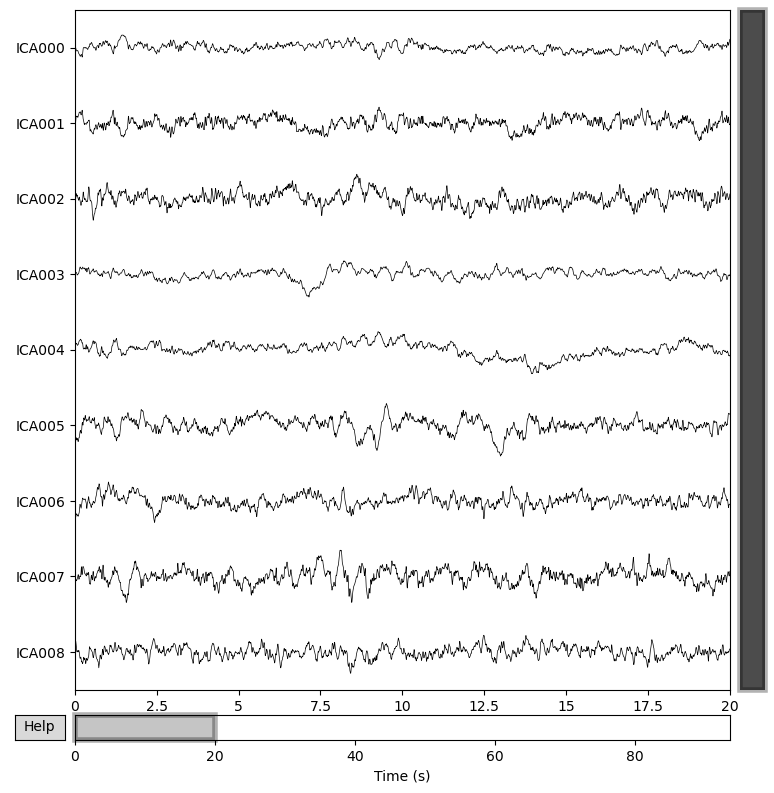

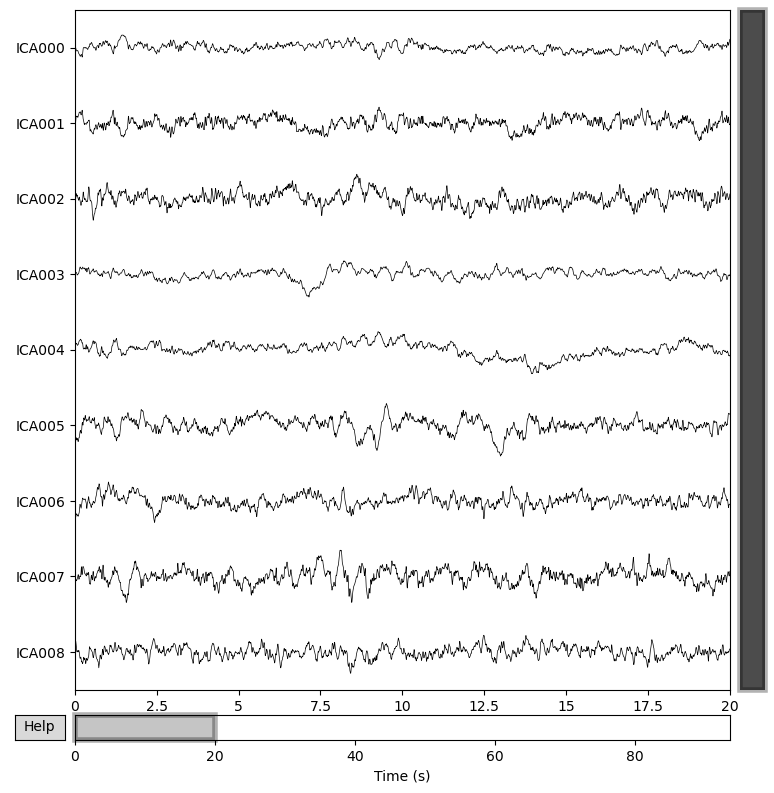

In [31]:
 ica.plot_sources(raw1, block=False)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
# pick the EEG channels for ICA
picks = mne.pick_types(raw2.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw2, picks=picks)


Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 9 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_29240\370007711.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw2, picks=picks)


Fitting ICA took 2.7s.


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 23964 samples), 9 ICA components (9 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=9, n_times=23964
    Range : 0 ... 23963 =      0.000 ...    93.605 secs
Ready.


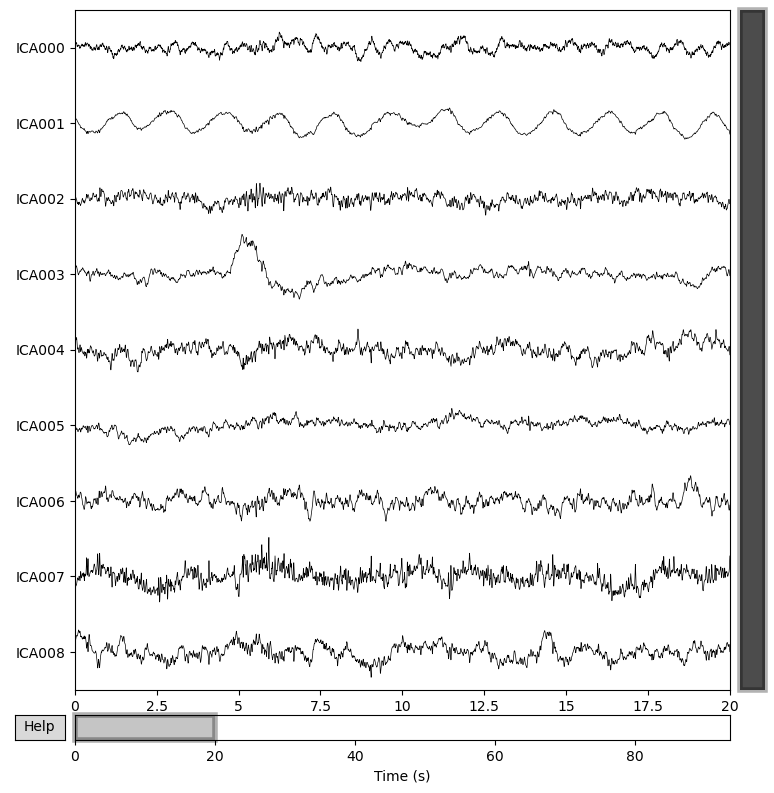

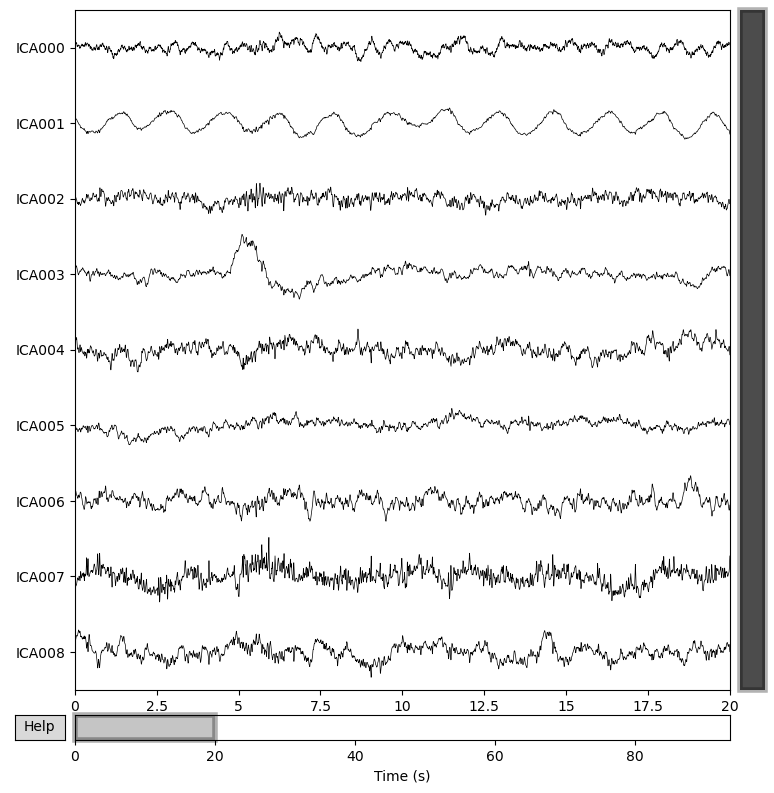

In [33]:
 ica.plot_sources(raw2, block=False)

### First particpant analysis EEG Data

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


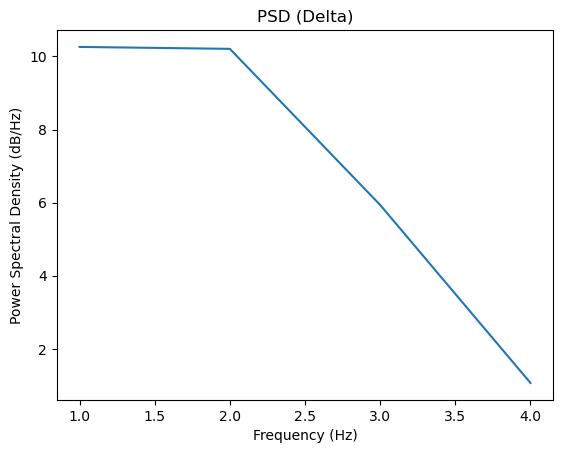

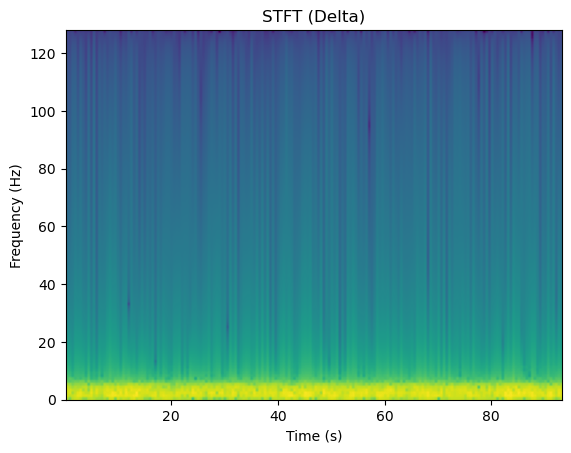

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


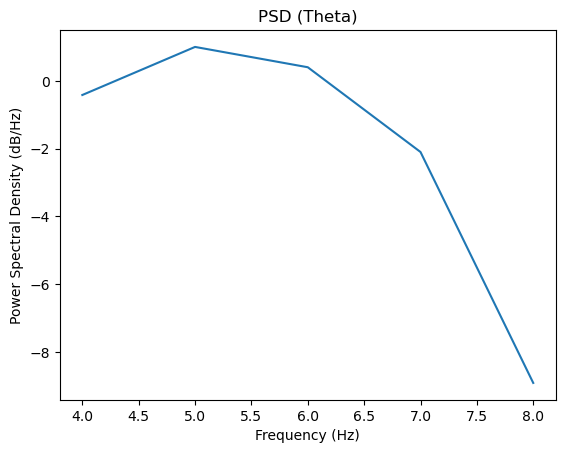

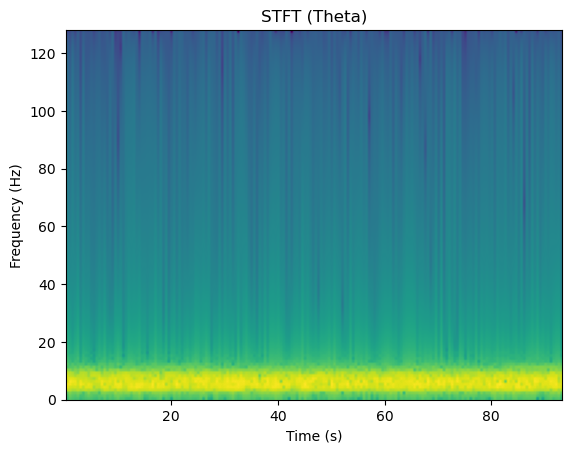

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


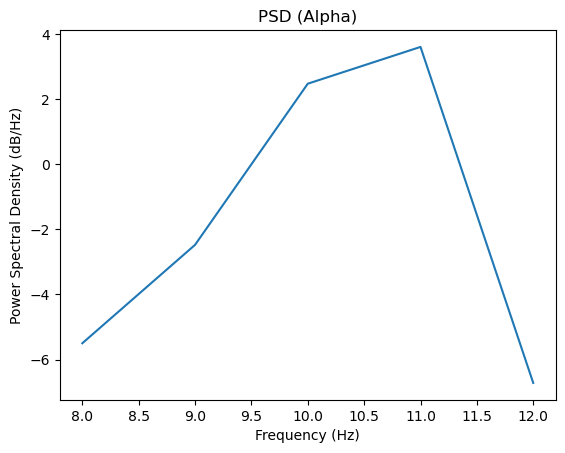

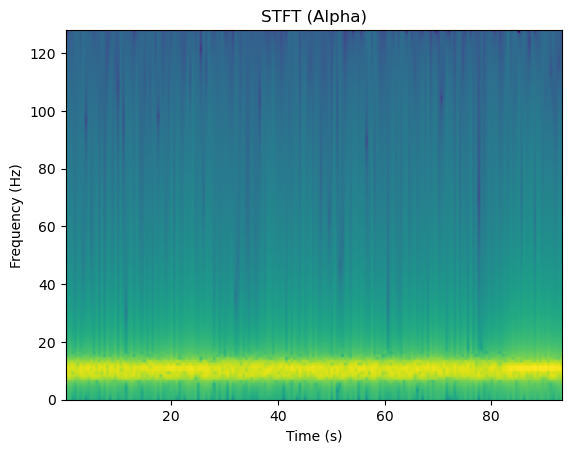

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


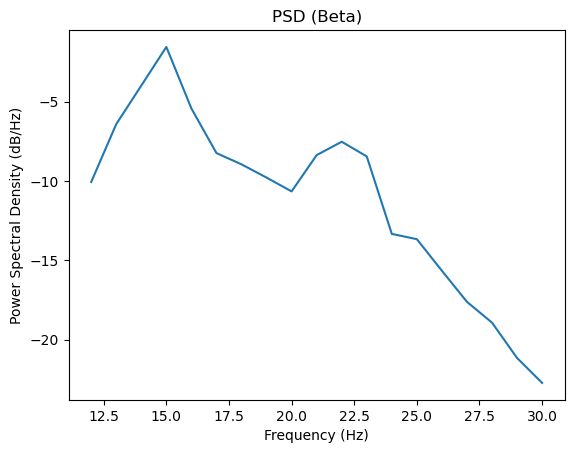

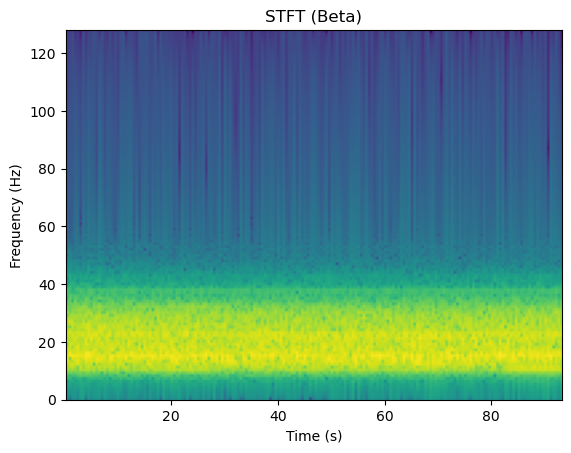

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


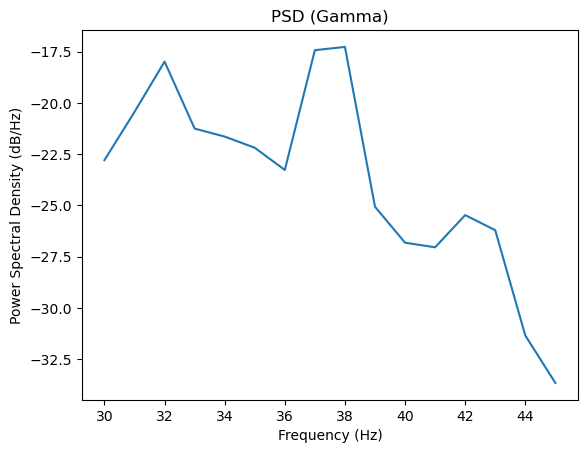

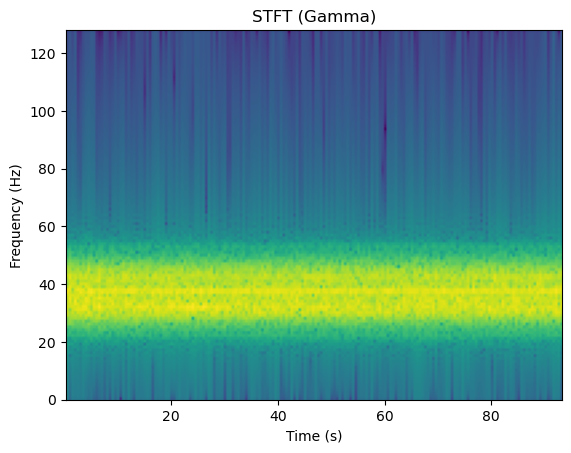

In [34]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw1.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

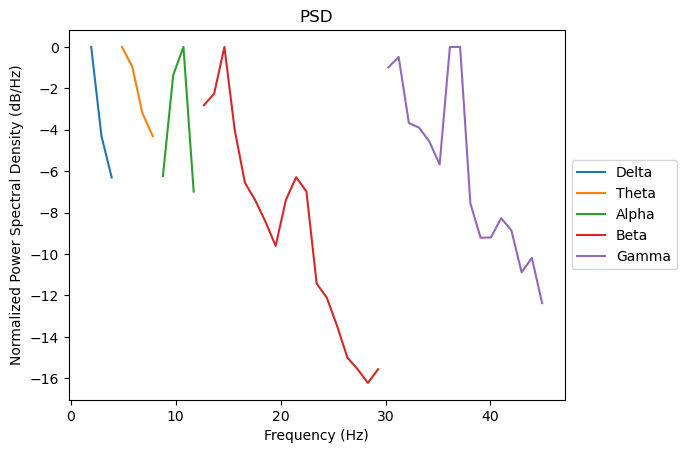

In [68]:
# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df_participant1.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


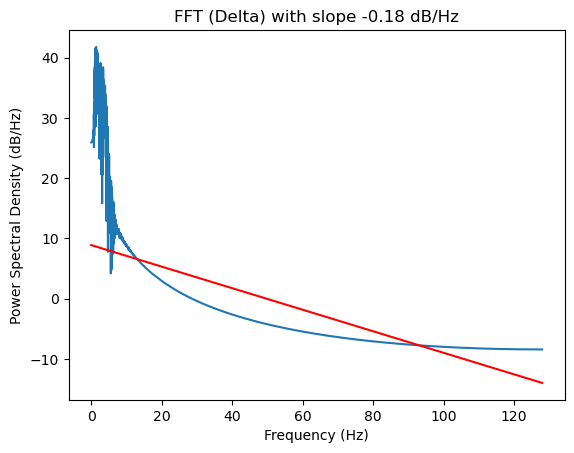

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


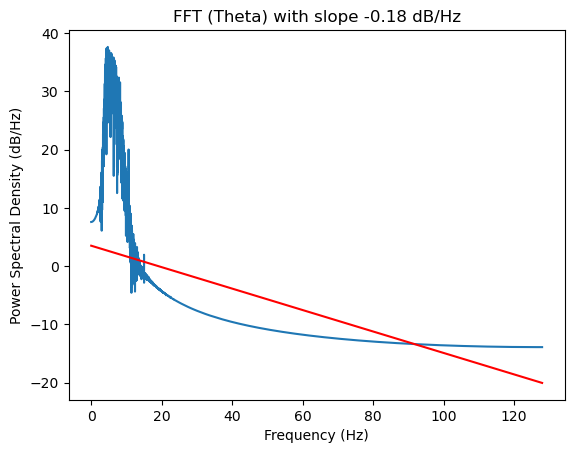

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


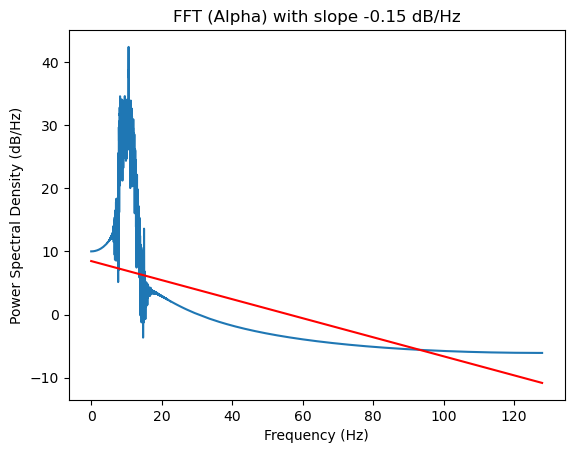

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


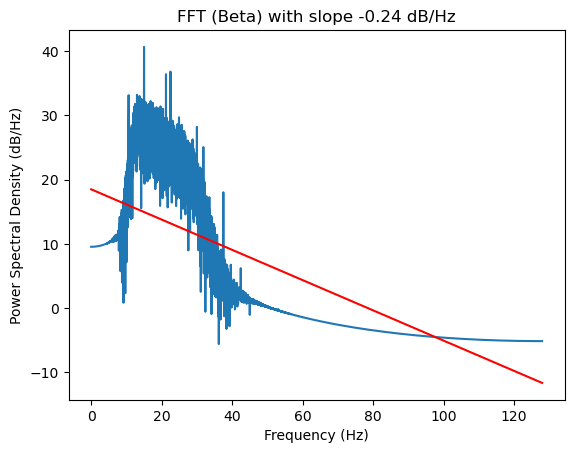

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


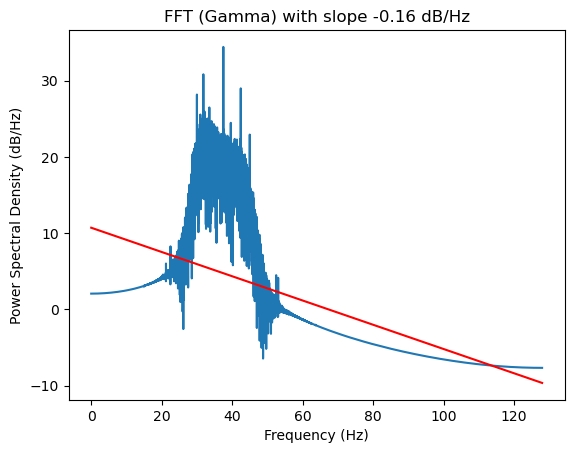

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw1.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

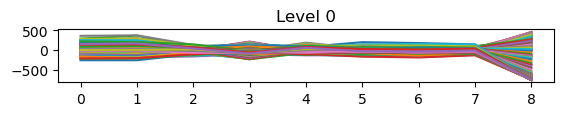

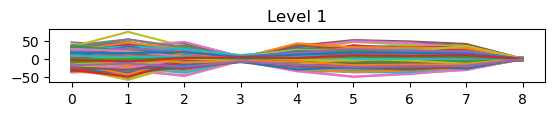

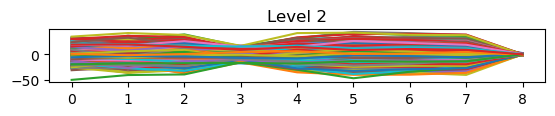

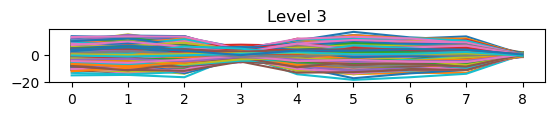

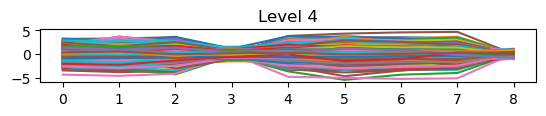

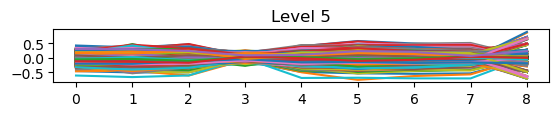

mean_spectrum: [4.89423939e+04 1.55667865e+02 9.56146455e+01 1.35794544e+01
 6.76344651e-01 1.06828518e-02]
var_spectrum: [1.63515927e+10 1.03087590e+04 2.08351751e+03 4.51364245e+01
 9.87664140e-02 6.58710003e-06]


In [76]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw1.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [78]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw1.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw1.ch_names), len(raw1.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw1.ch_names, columns=raw1.ch_names)

# Print the connectivity matrix in a neat format
df_causality


F3            Fz            F4        C3            Cz  \
F3  0.000000e+00  8.866733e-03  7.725791e-10  0.000019  2.594115e-16   
Fz  2.385151e-01  0.000000e+00  5.650183e-03  0.000120  3.410651e-08   
F4  2.557268e-03  2.388872e-01  0.000000e+00  0.000027  6.956868e-02   
C3  1.272999e-02  7.747400e-02  1.912520e-09  0.000000  1.257803e-06   
Cz  1.089242e-11  3.032642e-08  2.906254e-01  0.000006  0.000000e+00   
C4  7.961390e-01  2.542636e-01  2.905451e-01  0.000110  8.352773e-02   
P3  1.269741e-01  9.326145e-01  4.470938e-01  0.000067  8.313820e-02   
Pz  1.605693e-03  1.053222e-01  2.264124e-02  0.000084  6.094079e-01   
P4  1.356597e-47  9.730210e-38  4.053095e-74  0.903296  6.883235e-69   

              C4            P3            Pz        P4  
F3  3.308861e-11  9.087549e-13  4.352727e-14  0.730920  
Fz  1.692612e-04  8.759277e-05  2.547645e-06  0.778722  
F4  4.603116e-06  1.134744e-03  4.505129e-03  0.824364  
C3  2.571827e-10  1.361454e-08  5.785084e-11  0.838484  
Cz  4.968815e-02  1.834621e-01  1.130308e-02  0.822952  
C4  0.000000e+00  3.763998e-01  9.311619e-01  0.931979  
P3  1.018856e-01  0.000000e+00  1.541005e-01  0.935393  
Pz  4.169243e-01  4.520652e-02  0.000000e+00  0.927315  
P4  1.390566e-38  1.456665e-51  2.512708e-49  0.000000

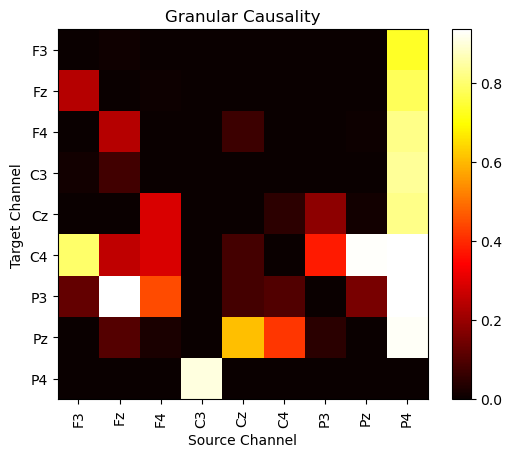

In [79]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw1.ch_names)), raw1.ch_names, rotation=90)
plt.yticks(np.arange(len(raw1.ch_names)), raw1.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()


### Second participant analysis EEG data

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


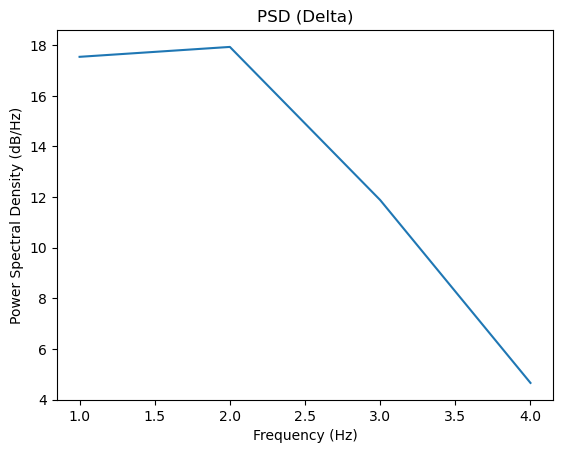

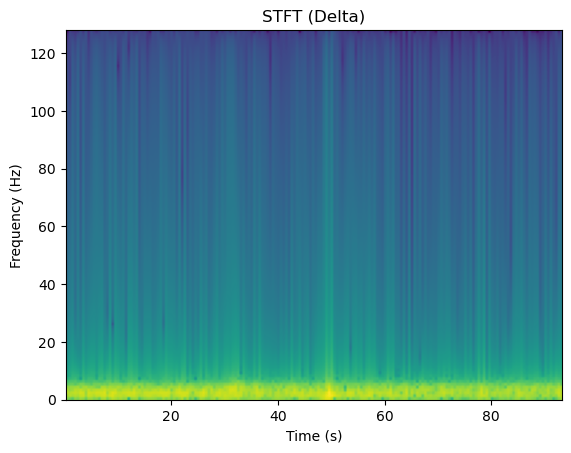

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


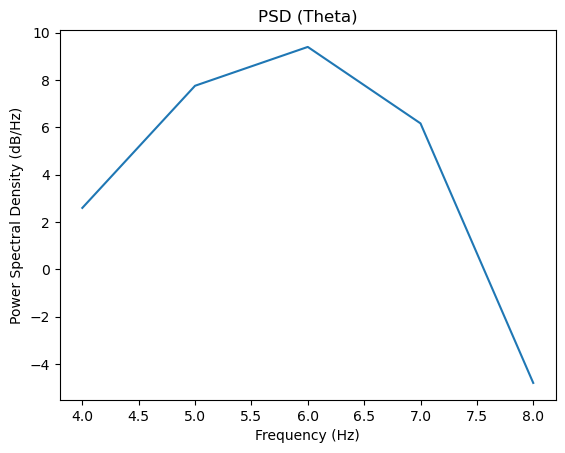

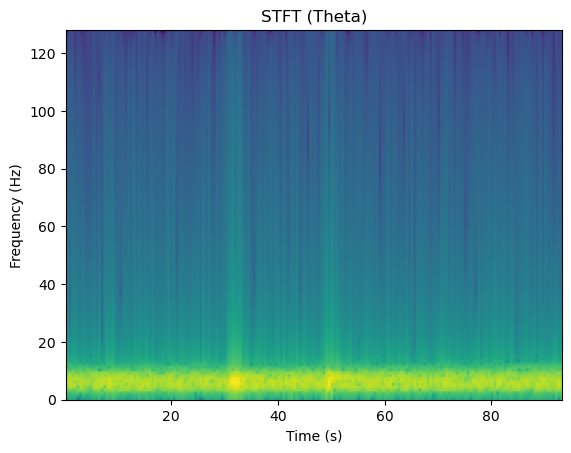

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


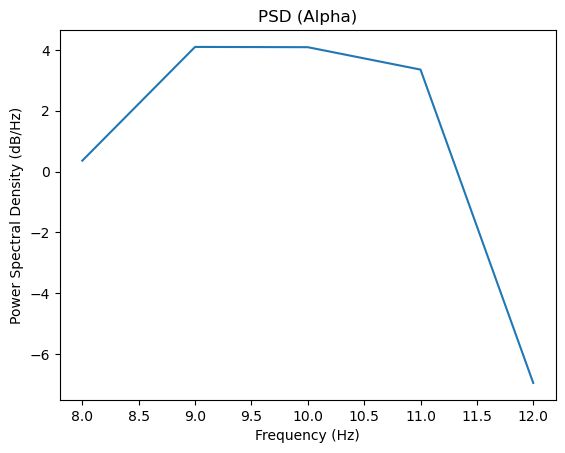

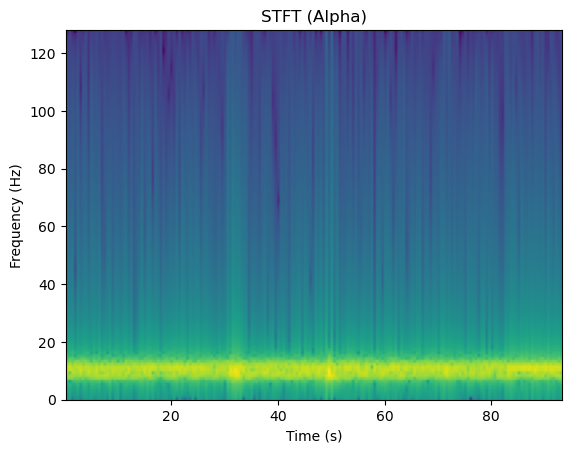

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


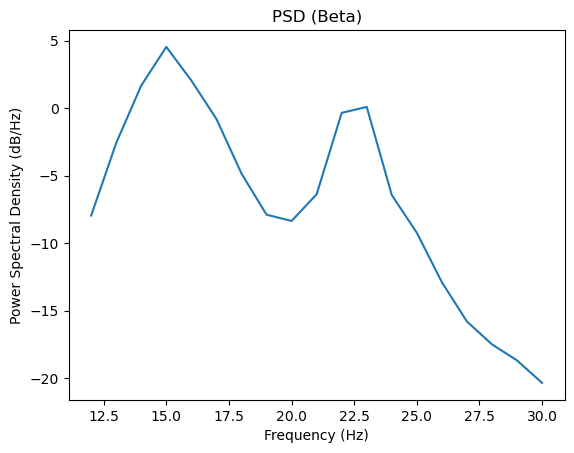

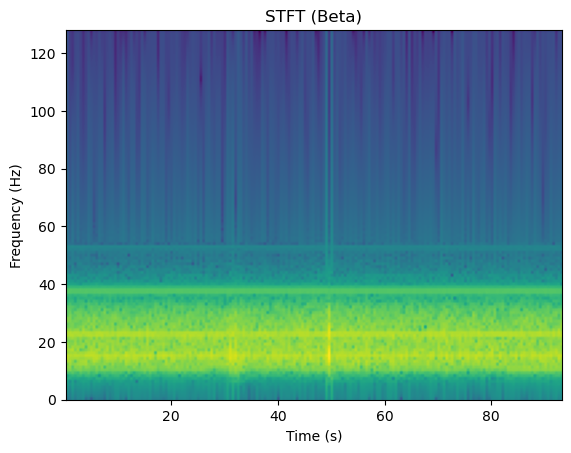

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


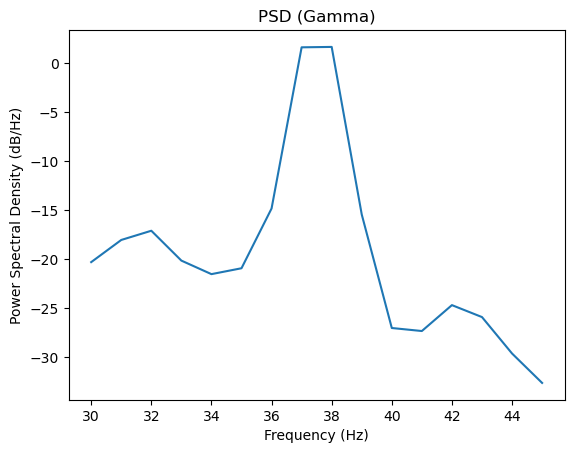

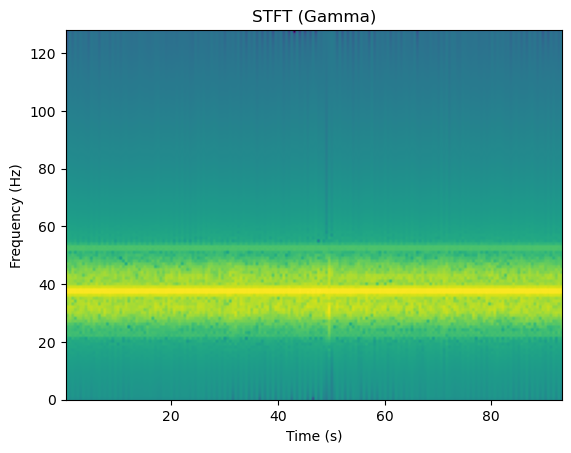

In [35]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw2.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

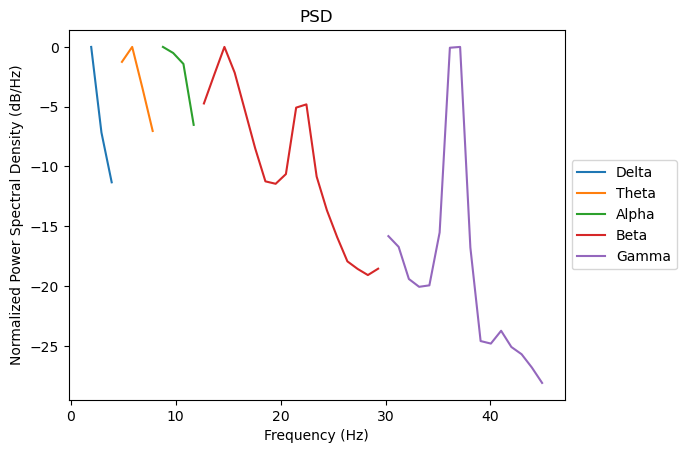

In [69]:

# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df_participant2.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


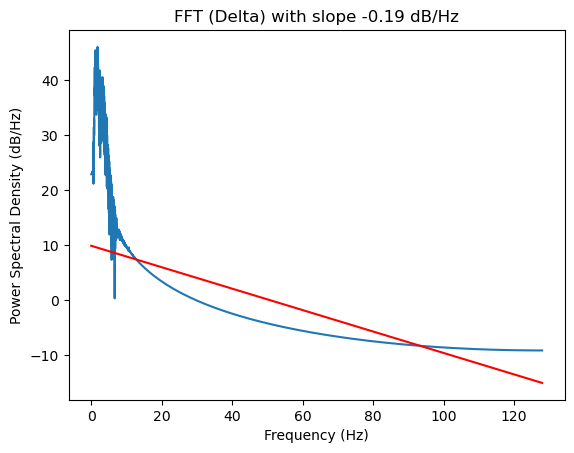

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


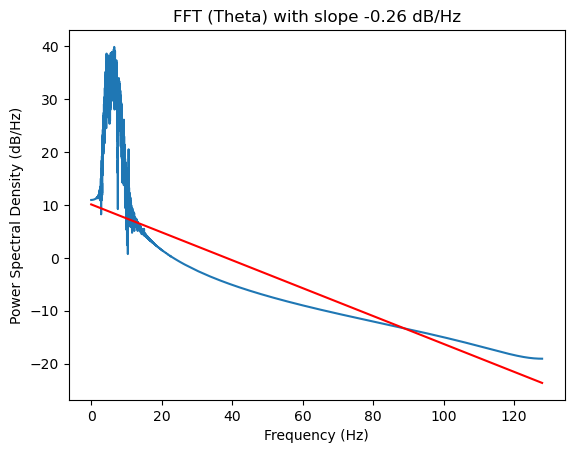

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


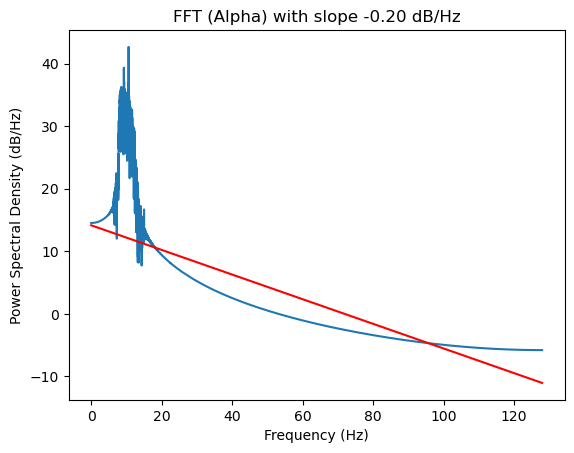

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


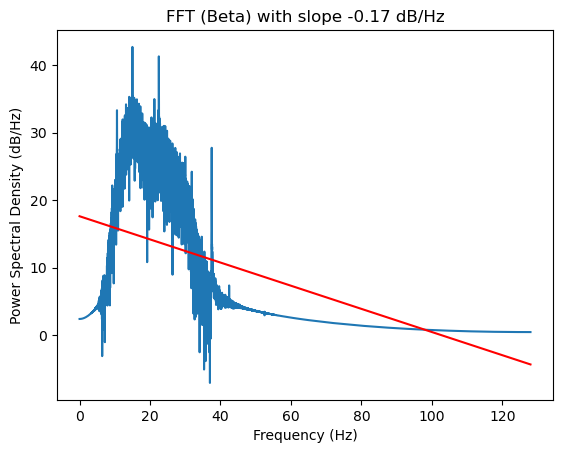

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


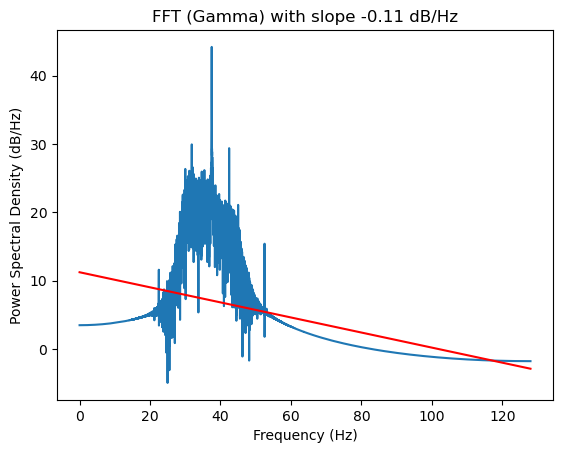

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw2.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

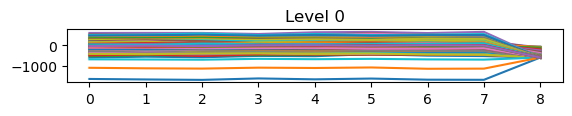

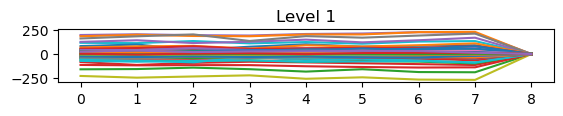

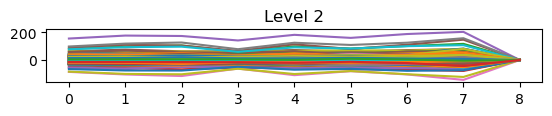

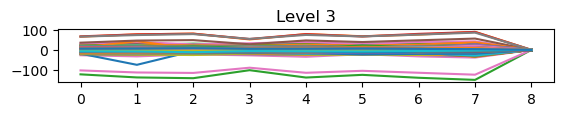

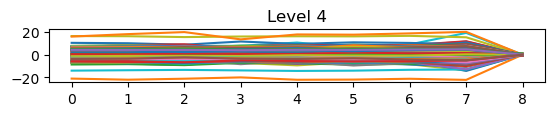

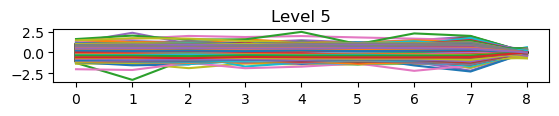

mean_spectrum: [5.08755275e+04 5.70886398e+02 2.22981374e+02 5.61403314e+01
 1.03549611e+01 2.35243584e-01]
var_spectrum: [6.95531427e+09 5.23201539e+04 1.06057924e+04 6.62557719e+02
 1.48854488e+01 7.30835595e-03]


In [37]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw2.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [40]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw2.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw2.ch_names), len(raw2.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw2.ch_names, columns=raw2.ch_names)

# Print the connectivity matrix in a neat format
df_causality



F3            Fz            F4            C3            Cz  \
F3  0.000000e+00  4.183718e-02  3.947855e-01  1.295020e-02  1.644443e-04   
Fz  3.689764e-02  0.000000e+00  2.649048e-01  7.816050e-01  2.355152e-02   
F4  1.973286e-01  9.392975e-01  0.000000e+00  8.320860e-01  1.807550e-01   
C3  4.971803e-02  7.176311e-01  4.011394e-01  0.000000e+00  2.762783e-03   
Cz  2.737278e-04  1.459640e-02  1.217667e-03  6.984579e-05  0.000000e+00   
C4  2.542673e-04  1.376459e-02  1.314166e-02  6.818957e-04  5.534989e-02   
P3  2.772465e-02  2.982716e-01  8.156383e-02  2.320904e-02  7.962976e-01   
Pz  3.237279e-13  2.716691e-09  3.788785e-13  2.770646e-17  4.330706e-09   
P4  6.565640e-45  9.787416e-44  1.215307e-45  6.425543e-43  3.025938e-44   

              C4            P3            Pz        P4  
F3  1.256256e-02  1.288059e-03  4.467438e-05  0.158279  
Fz  5.383226e-01  6.824713e-02  5.147960e-03  0.214369  
F4  1.568725e-02  4.539545e-02  1.249349e-02  0.212487  
C3  1.327148e-01  7.434112e-03  1.366736e-04  0.205210  
Cz  1.080423e-01  9.675614e-01  3.348292e-03  0.250277  
C4  0.000000e+00  2.041801e-01  4.850232e-01  0.281898  
P3  6.511571e-01  0.000000e+00  6.090117e-03  0.238139  
Pz  5.674773e-13  1.388756e-11  0.000000e+00  0.288911  
P4  3.572853e-39  4.983422e-39  2.903717e-41  0.000000

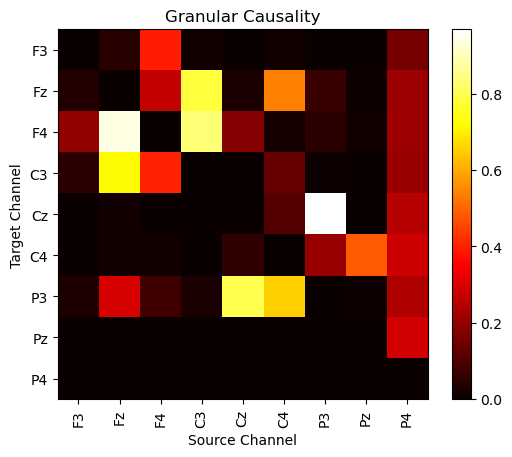

In [41]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw2.ch_names)), raw2.ch_names, rotation=90)
plt.yticks(np.arange(len(raw2.ch_names)), raw2.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()


### EMG DATA ANALYSIS

In [42]:
# Extract columns 'col11' and 'col21' into a new DataFrame
new_df = df[['11', '21']].copy()

# Print the new DataFrame
new_df


11     21
0       47.2  -71.5
1       46.9  -70.9
2       46.6  -70.3
3       46.2  -69.6
4       45.8  -69.1
...      ...    ...
23959 -132.0 -106.0
23960 -132.0 -106.0
23961 -132.0 -106.0
23962 -132.0 -106.0
23963 -132.0 -106.0

[23964 rows x 2 columns]

In [59]:
import mne
import pandas as pd


sfreq = 1000  # Sampling frequency in Hz
ch_names = ['EMG1', 'EMG2']  # Channel names
ch_types = ['emg'] * len(ch_names)  # Channel types, set as 'emg' for EMG data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(new_df.T, info)




Creating RawArray with float64 data, n_channels=2, n_times=23964
    Range : 0 ... 23963 =      0.000 ...    23.963 secs
Ready.


 -------------------*********** For Band: Delta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


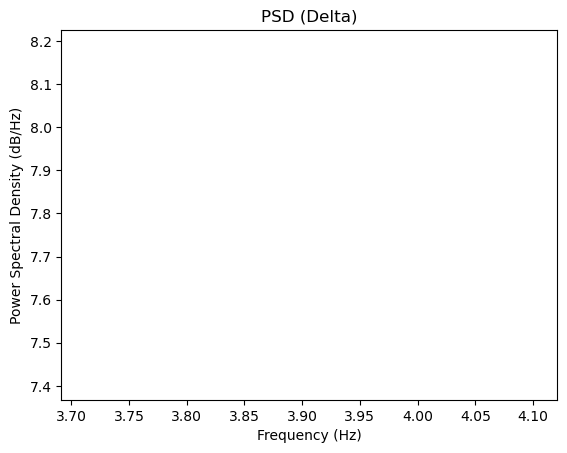

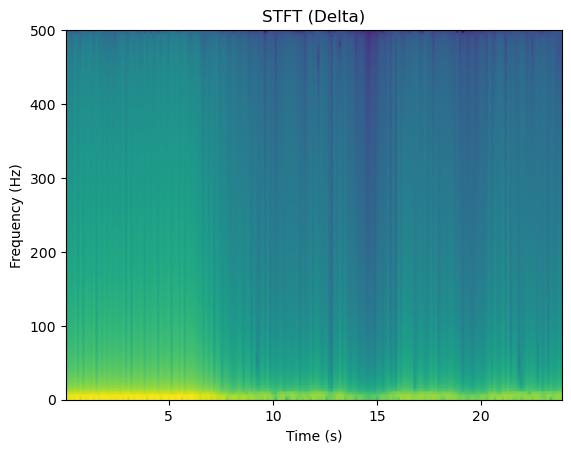

 -------------------*********** For Band: Theta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


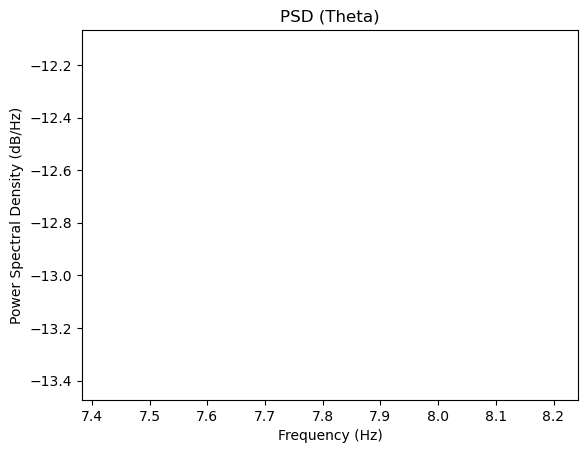

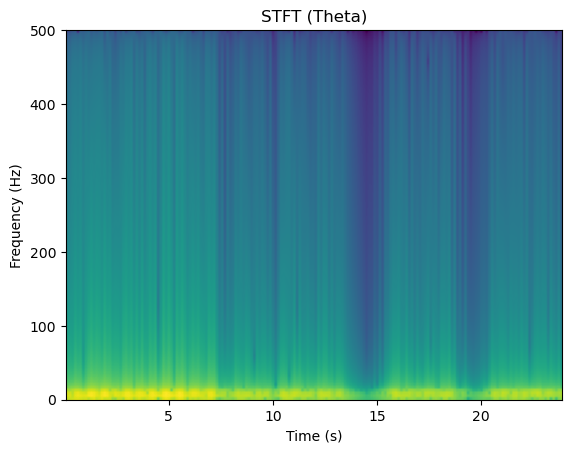

 -------------------*********** For Band: Alpha  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


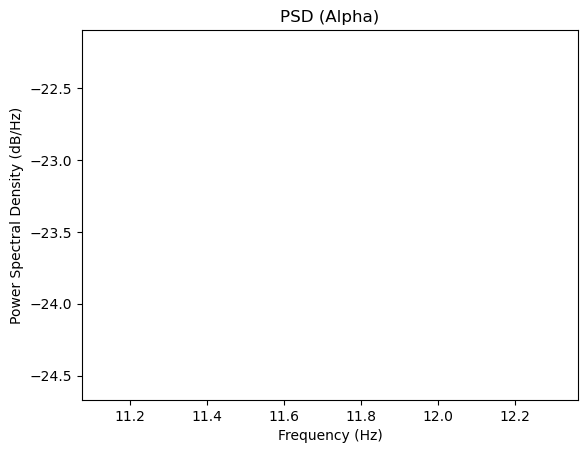

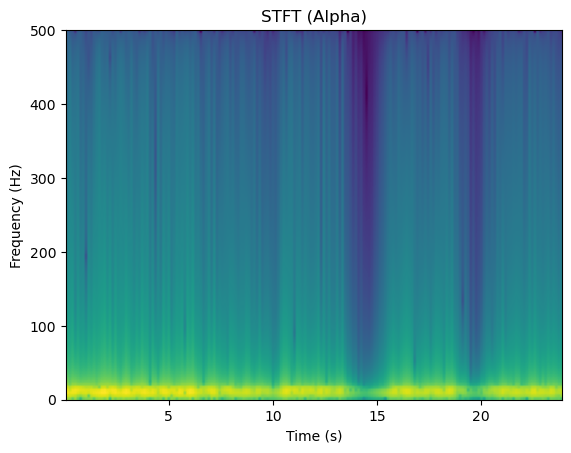

 -------------------*********** For Band: Beta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


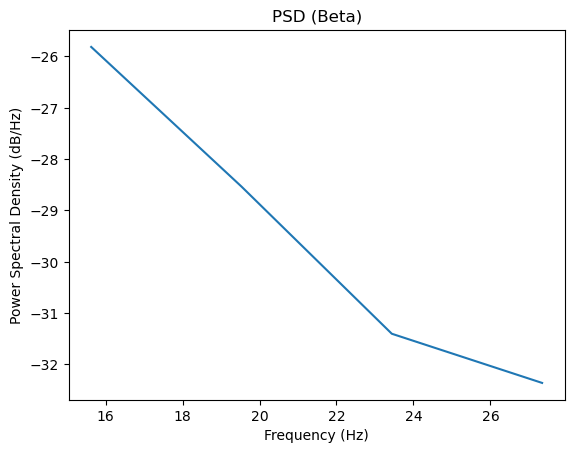

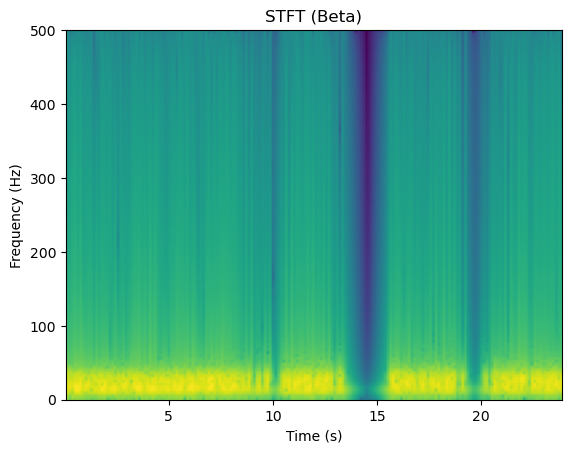

 -------------------*********** For Band: Gamma  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


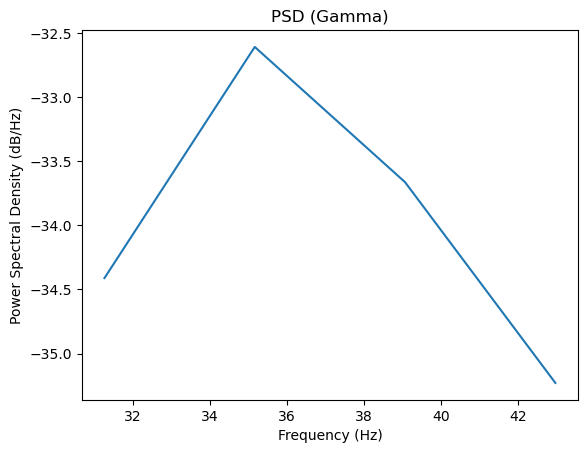

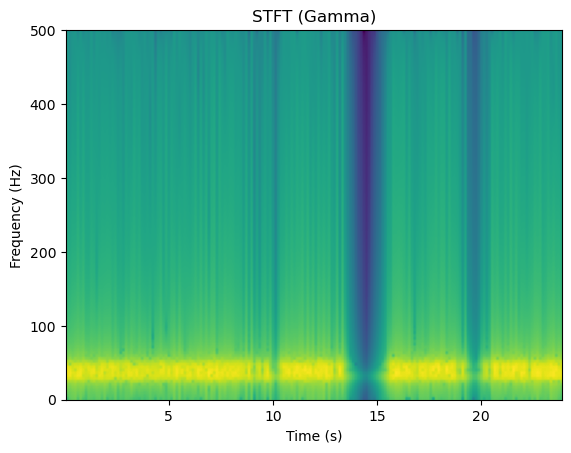

In [64]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    # Define the picks variable with the desired channel types
    #picks = mne.pick_types(raw.info, meg=False, eeg=False, emg=True)
    # Explicitly pass picks to mne.pick_types
    emg_picks = mne.pick_types(info, emg=True)
    raw_band = raw.copy().filter(fmin, fmax, picks=emg_picks, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


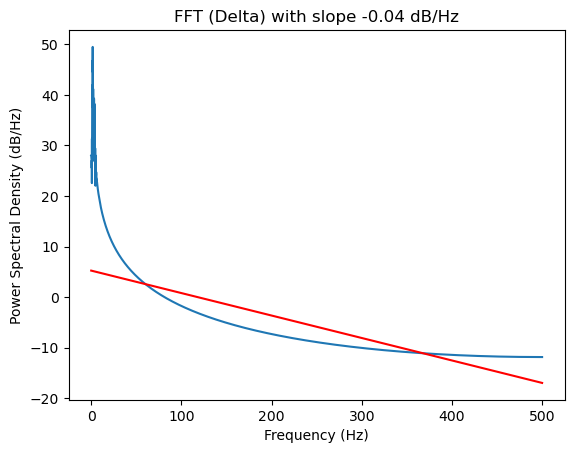

 -------------------*********** For Band: Theta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


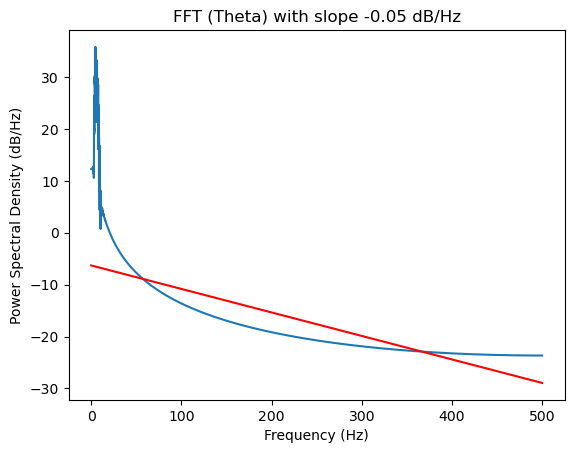

 -------------------*********** For Band: Alpha  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


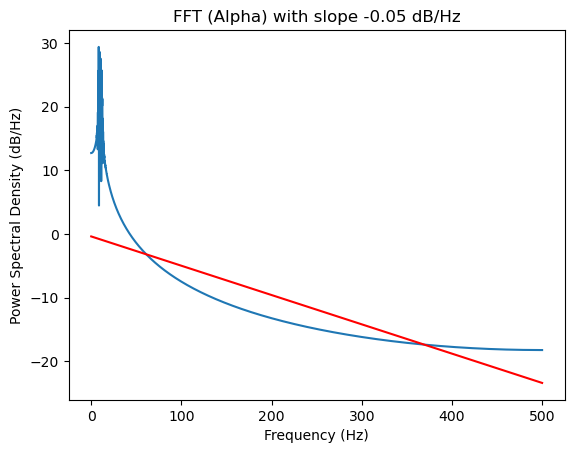

 -------------------*********** For Band: Beta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


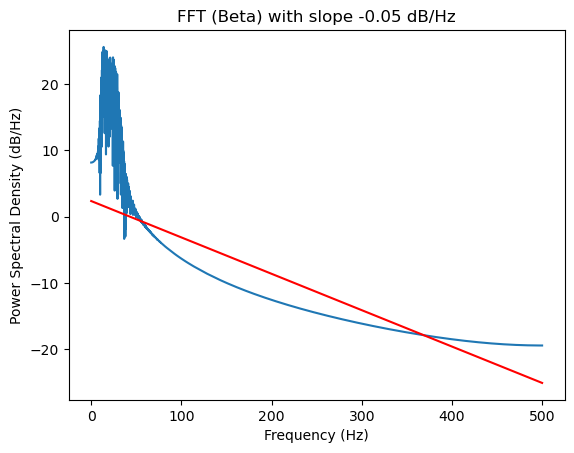

 -------------------*********** For Band: Gamma  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.256 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


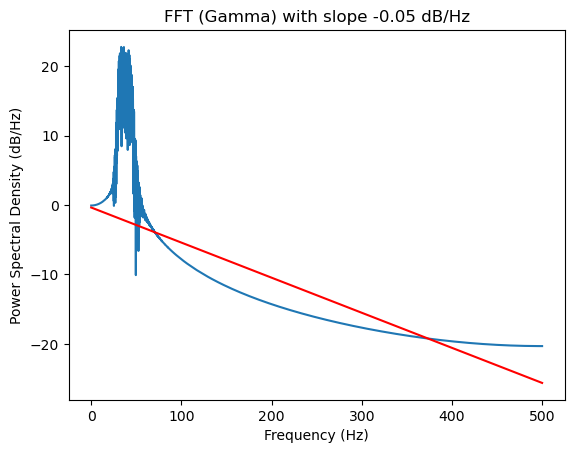

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    emg_picks = mne.pick_types(info, emg=True)
    raw_band = raw.copy().filter(fmin, fmax, picks=emg_picks, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

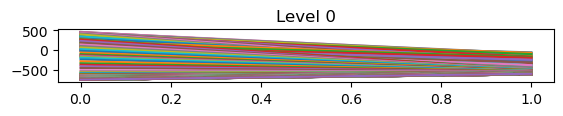

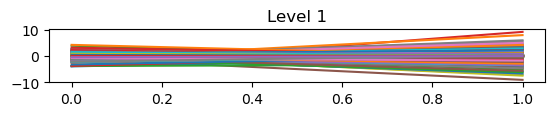

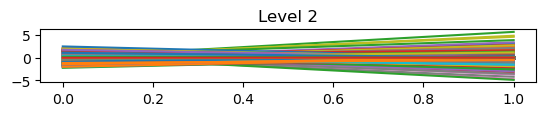

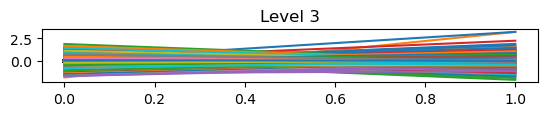

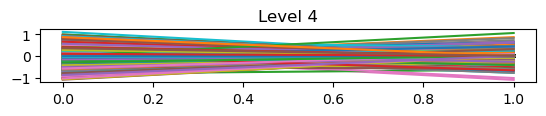

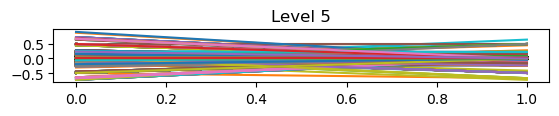

mean_spectrum: [3.48666178e+05 1.36408434e+00 3.18102035e-01 8.19608471e-02
 1.64005034e-02 5.66956960e-03]
var_spectrum: [3.83541778e+09 4.30097527e-01 6.01493216e-03 2.50906398e-04
 7.96507662e-05 1.25456436e-05]


In [65]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [66]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw.ch_names), len(raw.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw.ch_names, columns=raw.ch_names)

# Print the connectivity matrix in a neat format
df_causality

EMG1      EMG2
EMG1  0.000000  0.000006
EMG2  0.877627  0.000000

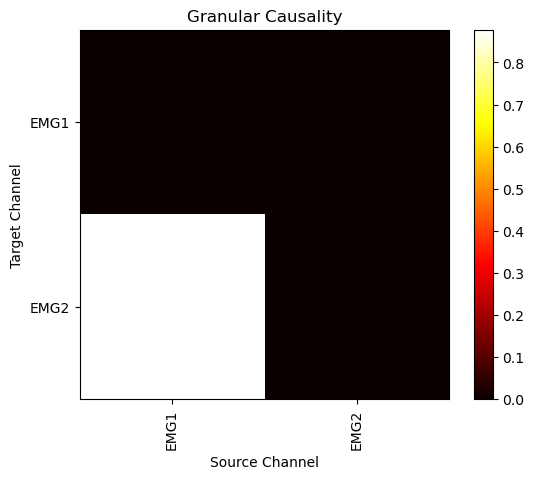

In [67]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw.ch_names)), raw.ch_names, rotation=90)
plt.yticks(np.arange(len(raw.ch_names)), raw.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()
